# Predicting Housing Prices in Australia using Ridge and Lasso Regression
## Process steps:
    1. Reading data.
    2. Inspecting data.
    3. EDA
    4. Splitting train and test data.
    5. Imputation of missing values.
    6. Scaling, if any.
    7. Modeling.
    8. Regularization and hyperparameter tuning.

In [1]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing sklearn and statsmodels libraries
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Enable warning supression
import warnings
warnings.filterwarnings("ignore")

## Loading and examining the data

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
housing = pd.read_csv("train.csv")
print(housing.shape)
housing.head(10)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [3]:
housing.info()
housing.agg(['count','size','nunique','dtypes'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460,1460,1460,1201,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1452,1460,1460,1460,1423,1423,1422,1423,1460,1422,1460,1460,1460,1460,1460,1460,1459,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,770,1379,1379,1379,1460,1460,1379,1379,1460,1460,1460,1460,1460,1460,1460,7,281,54,1460,1460,1460,1460,1460,1460
size,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
nunique,1460,15,5,110,1073,2,2,4,4,2,5,3,25,9,8,5,8,10,9,112,61,6,8,15,16,4,327,4,5,6,4,4,4,6,637,6,144,780,721,6,5,2,5,753,417,24,861,4,3,4,3,8,4,4,12,7,4,5,6,97,3,5,441,5,5,3,274,202,120,20,76,8,3,4,4,21,12,5,9,6,663
dtypes,int64,int64,object,float64,int64,object,object,object,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,object,object,object,object,float64,object,object,object,object,object,object,object,int64,object,int64,int64,int64,object,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,int64,object,int64,object,object,float64,object,int64,int64,object,object,object,int64,int64,int64,int64,int64,int64,object,object,object,int64,int64,int64,object,object,int64


In [4]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
numerical_original = housing.select_dtypes(include=[np.number])
print("Numerical attributes are: \n")
# This is crucial as, given the nature of these features, we could choose to retain them as categorical
# even though they appear numerical.
numcat = ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
          'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
          'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
          'MoSold', 'YrSold']
numerical = numerical_original.drop(numcat, axis=1)
numerical.columns

#print("Numerical attributes are: \n", numerical)

Numerical attributes are: 



Index(['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

In [6]:
ordered_categorical = numcat
print("Discrete valued numeric or ordered categorical attributes are: \n")
ordered_categorical

Discrete valued numeric or ordered categorical attributes are: 



['MSSubClass',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'MoSold',
 'YrSold']

In [7]:
categorical = housing.select_dtypes(exclude=[np.number])
print("Categorical attributes are: \n")
#categorical = categorical.add(housing[numcat])
categorical.columns
#print("Categorical attributes are: \n", categorical)

Categorical attributes are: 



Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### Checking for duplicate rows

In [8]:
duplicate = housing[housing.duplicated()]
duplicate

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


## Analyzing null values

In [9]:
# Percentage of missing values for all attributes
round(100*(housing.isnull().sum()/len(housing.index)), 2).sort_values(ascending = False).to_frame('Missing values').reset_index()

,index,Missing values
0,PoolQC,99.52
1,MiscFeature,96.30
2,Alley,93.77
3,Fence,80.75
4,FireplaceQu,47.26
5,LotFrontage,17.74
6,GarageYrBlt,5.55
7,GarageCond,5.55
8,GarageType,5.55
9,GarageFinish,5.55


#### We notice that a number of features have missing values in very high amounts. We will refer to the data dictionary to fix them or remove them, accordingly.
    1. PoolQC
    2. MiscFeature
    3. Alley
    4. Fence
    5. FireplaceQu
    6. LotFrontage

#### Using data-dictionary to confirm appropriate values for the missing values. Please note that we are not performing imputation here. That would be done post  train-test split to avoid any data leakage.

## Handling null values
    Looking at the data dictionary, we identify the following:
    1. The NA values in Alley feature refer to the absence of an alley hence, it is not technically NA! We replace it    with "Not available".
    2. The same issue is also with BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence and MiscFeature. We will replace them all with "Not available".
    3. The features, PoolQC and MiscFeature are predominantly just a sinlge value and will not hold much predictive power hence they may be dropped.

In [10]:
NA_value_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
for feature in NA_value_features:
    housing[feature].fillna('Not available', inplace=True)

# Again computing percentage of missing values for all attributes
round(100*(housing.isnull().sum()/len(housing.index)), 2).sort_values(ascending = False).to_frame('Missing values').reset_index()

,index,Missing values
0,LotFrontage,17.74
1,GarageYrBlt,5.55
2,MasVnrType,0.55
3,MasVnrArea,0.55
4,Electrical,0.07
5,KitchenQual,0.00
6,GarageType,0.00
7,FireplaceQu,0.00
8,Fireplaces,0.00
9,Functional,0.00


### Observations:
We notice that the null values are now limited to just four features and the values will be imputed later after the train-test split.

### Checking the nature of unique values for a few attributes:

In [11]:
housing.MiscFeature.value_counts() / len(housing)

Not available    0.963014
Shed             0.033562
Othr             0.001370
Gar2             0.001370
TenC             0.000685
Name: MiscFeature, dtype: float64

In [12]:
housing.PoolQC.value_counts() / len(housing)

Not available    0.995205
Gd               0.002055
Fa               0.001370
Ex               0.001370
Name: PoolQC, dtype: float64

In [13]:
housing.PoolArea.value_counts() / len(housing)

0      0.995205
480    0.000685
512    0.000685
519    0.000685
555    0.000685
576    0.000685
648    0.000685
738    0.000685
Name: PoolArea, dtype: float64

In [14]:
housing.MiscVal.value_counts() / len(housing)

0        0.964384
400      0.007534
500      0.005479
700      0.003425
450      0.002740
600      0.002740
2000     0.002740
480      0.001370
1200     0.001370
2500     0.000685
350      0.000685
560      0.000685
54       0.000685
620      0.000685
8300     0.000685
800      0.000685
1150     0.000685
15500    0.000685
1300     0.000685
1400     0.000685
3500     0.000685
Name: MiscVal, dtype: float64

### Observations:
These are just somf of the features with very little variation. They possibly will have little significance in predicting, but we will visualize them and then choose to drop some of them as needed.

## Outlier analysis

In [15]:
housing.describe(percentiles=[.01, .05, .10, .25, .5, .75, .90, .95, .99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
1%,15.590000,20.000000,21.000000,1680.000000,3.000000,3.000000,1899.180000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,520.000000,0.000000,0.000000,692.180000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,3.000000,0.000000,1916.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,61815.970000
5%,73.950000,20.000000,34.000000,3311.700000,4.000000,4.000000,1916.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,519.300000,672.950000,0.000000,0.000000,848.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,1930.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,88000.000000
10%,146.900000,20.000000,44.000000,5000.000000,5.000000,5.000000,1924.900000,1950.000000,0.000000,0.000000,0.000000,74.900000,636.900000,756.900000,0.000000,0.000000,912.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1945.000000,1.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2006.000000,106475.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000

In [16]:
housing2 = housing
numeric_attrib = numerical.columns
numeric_attrib = numeric_attrib.to_list()
numeric_attrib.remove('SalePrice')
for attrib in numeric_attrib:
    Q1 = housing2[attrib].quantile(0.25)
    Q3 = housing2[attrib].quantile(0.75)
    IQR = Q3 - Q1
    factor = 1.5
    housing2 = housing2[(housing2[attrib] >= Q1 - factor*IQR) & (housing2[attrib] <= Q3 + factor*IQR)]

In [17]:
print(housing2.shape)
print("Percentage of outliers is ", np.round((housing.shape[0] - housing2.shape[0])*100/housing.shape[0]))

(540, 81)
Percentage of outliers is  63.0


In [18]:
# We cannot simply remove outliers as it would lead to over half the data being lost, hence, we are capping outlier
# values at the two extremes.
housing2 = housing
for attrib in numeric_attrib:
    Q1 = housing2[attrib].quantile(0.25)
    Q3 = housing2[attrib].quantile(0.75)
    IQR = Q3 - Q1
    factor = 1.5
    maxval = Q3 + factor*IQR
    minval = Q1 - factor*IQR
    housing2[attrib][housing[attrib] > maxval] = maxval
    housing2[attrib][housing[attrib] < minval ] = minval

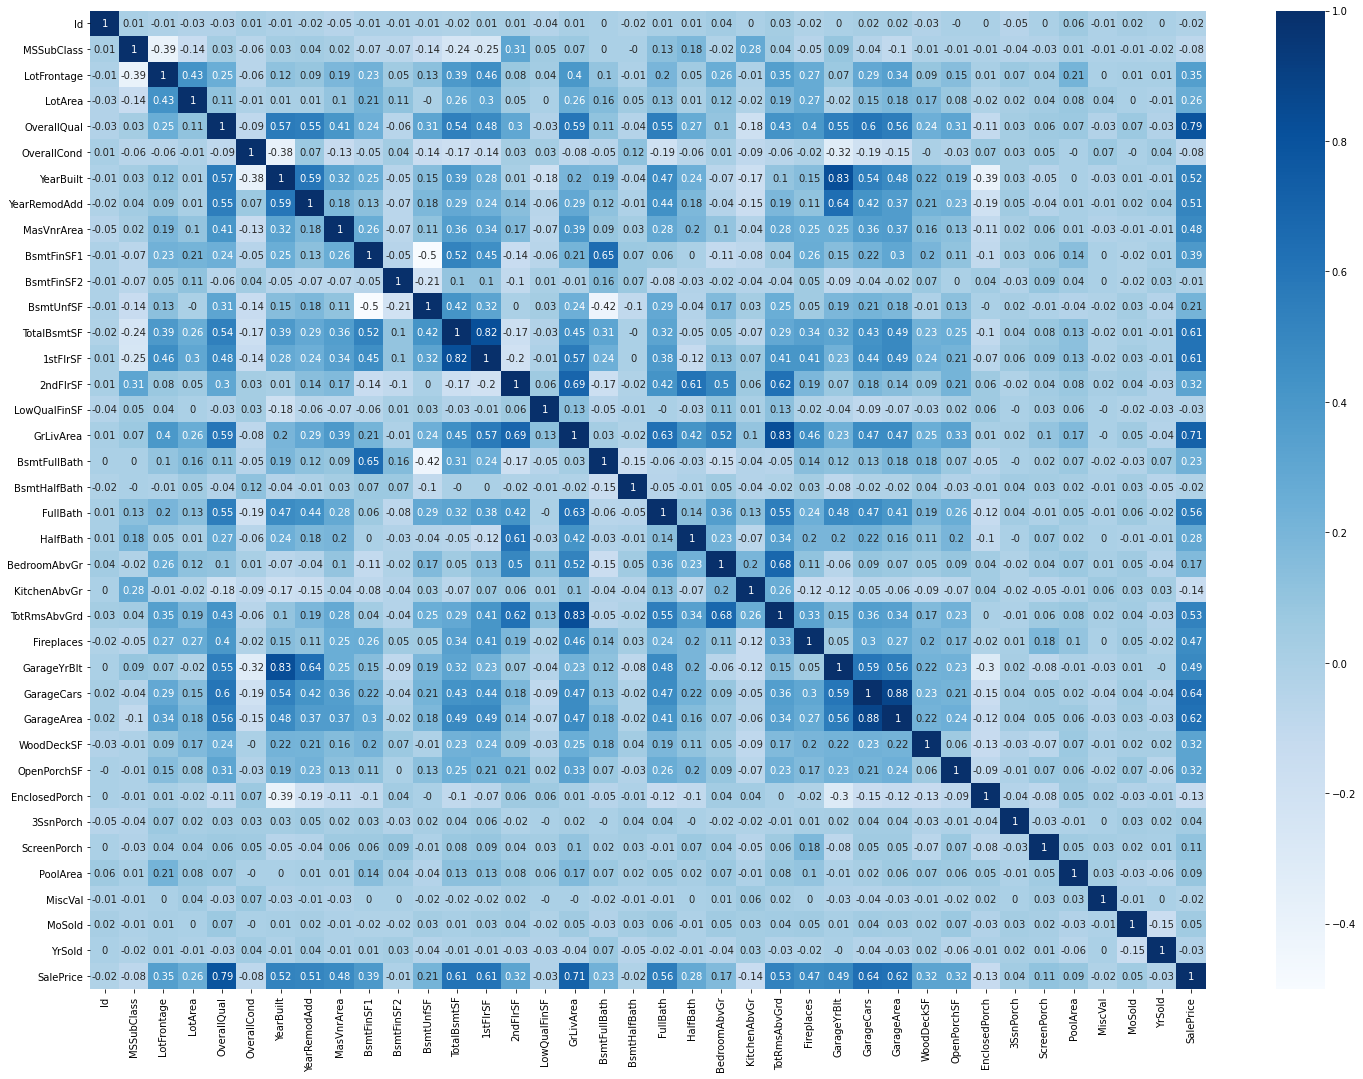

In [19]:
# We check the correlation coefficients to examine which variables are highly correlated
corr = numerical_original.corr().round(2)
plt.figure(figsize = (25, 18))
sns.heatmap(corr, annot = True, cmap = 'Blues')
plt.show()

### Observations based on heatmap: As expected, a few of the dependent variables are highly correlated to each other.
    1. GarageArea and GarageCars
    2. YearBuilt and GarageYrBlt
    3. GrLivArea and TotRmsAbvGr
    4. 1stFlrSF and TotalBsmtSF
 We should consider eliminating one each of such variables before modeling.

In [20]:
#If we want to see how features are related to the target variable we
# can also write the code below to obtain the feature correlation 
#coefficients with the target variable:

corr['SalePrice'].sort_values(ascending = False).to_frame('corr_value').reset_index()

,index,corr_value
0,SalePrice,1.00
1,OverallQual,0.79
2,GrLivArea,0.71
3,GarageCars,0.64
4,GarageArea,0.62
5,TotalBsmtSF,0.61
6,1stFlrSF,0.61
7,FullBath,0.56
8,TotRmsAbvGrd,0.53
9,YearBuilt,0.52


#### This gives us an idea of the utility of individual numeric attributes in predicting the SalePrice of the house. While these are preliminary results, we notice that the following are strongly related:
    1. OverallQual
    2. GrLivArea
    3. GarageCars
    4. TotalBsmtSF
    5. FullBath
 Note that these are also mostly what we would expect from our business knowledge.

## Derived features

In [21]:
housing2['YearBuilt'].head()

0    2003
1    1976
2    2001
3    1915
4    2000
Name: YearBuilt, dtype: int64

In [22]:
# Computing years from present date as derived metrics for all features having year.
from datetime import date
today = date.today()
# We use present year instead of hard-coding for generality
year = today.year
for feature in ['GarageYrBlt', 'YrSold', 'YearBuilt','YearRemodAdd']:
    housing2[feature] = year - housing2[feature]

housing2['YearBuilt'].head()

0     18
1     45
2     20
3    106
4     21
Name: YearBuilt, dtype: int64

### Visualizing numerical features vs. SalePrice

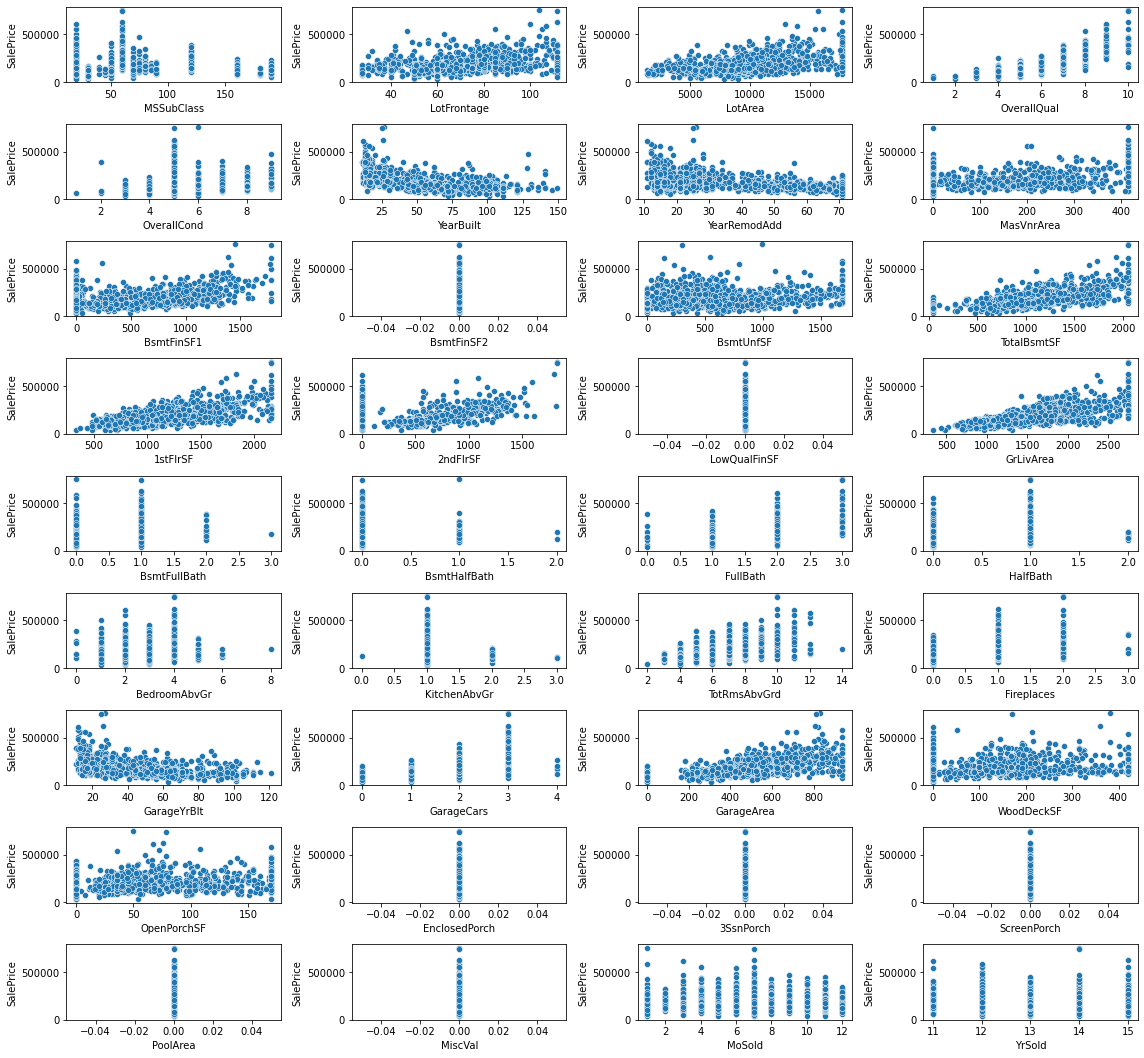

In [23]:
myPlot = plt.subplots(figsize=(16, 16))
feature_list = numerical_original.columns.tolist()
feature_list.remove('Id')
feature_list.remove('SalePrice')
i = 0
for feature in feature_list:
    i+=1
    plt.subplot(10, 4, i)
    plt.subplots_adjust(hspace = 4.0)
    sns.scatterplot(housing2[feature], housing2['SalePrice'])
    plt.tight_layout()

#### Observations:
    1. We have combined continuous and discrete numerical attributes here for combined visualization. The discrete        attributes will be treated as categorical features later.
    2. A lot of variables show almost linear or highly correlated trends with the target feature. For instance, GrLivArea, GarageArea, TotalBsmtSF, 1stFlrSF show a positive linear trend.
    3. Some variables have no variation in value and thus no predictive power.
    4. The numerical variables with discrete values are actually categorical variables and will be treated as such in    later analysis.
    5. We find discrete features OverallQual, OverallCond, TotRmsAbvGrd, GarageCars and FullBath etc. have have a positive trend with SalePrice.
    6. Features which have years, such as YearBuilt, YearRemodAdd and GarageYrBlt, can be better analyzed with derived    metrics like number of years from present date or such.

In [24]:
housing2[['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()

,BsmtFinSF2,LowQualFinSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Dropping numerical features lacking predictive power
From observing the scatter plots, we notice no variation in the above features. The describe() function confirms this. Hence they will be dropped.

In [25]:
housing2 = housing2.drop(['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis = 1)

### Visualizing categorical features vs. SalePrice

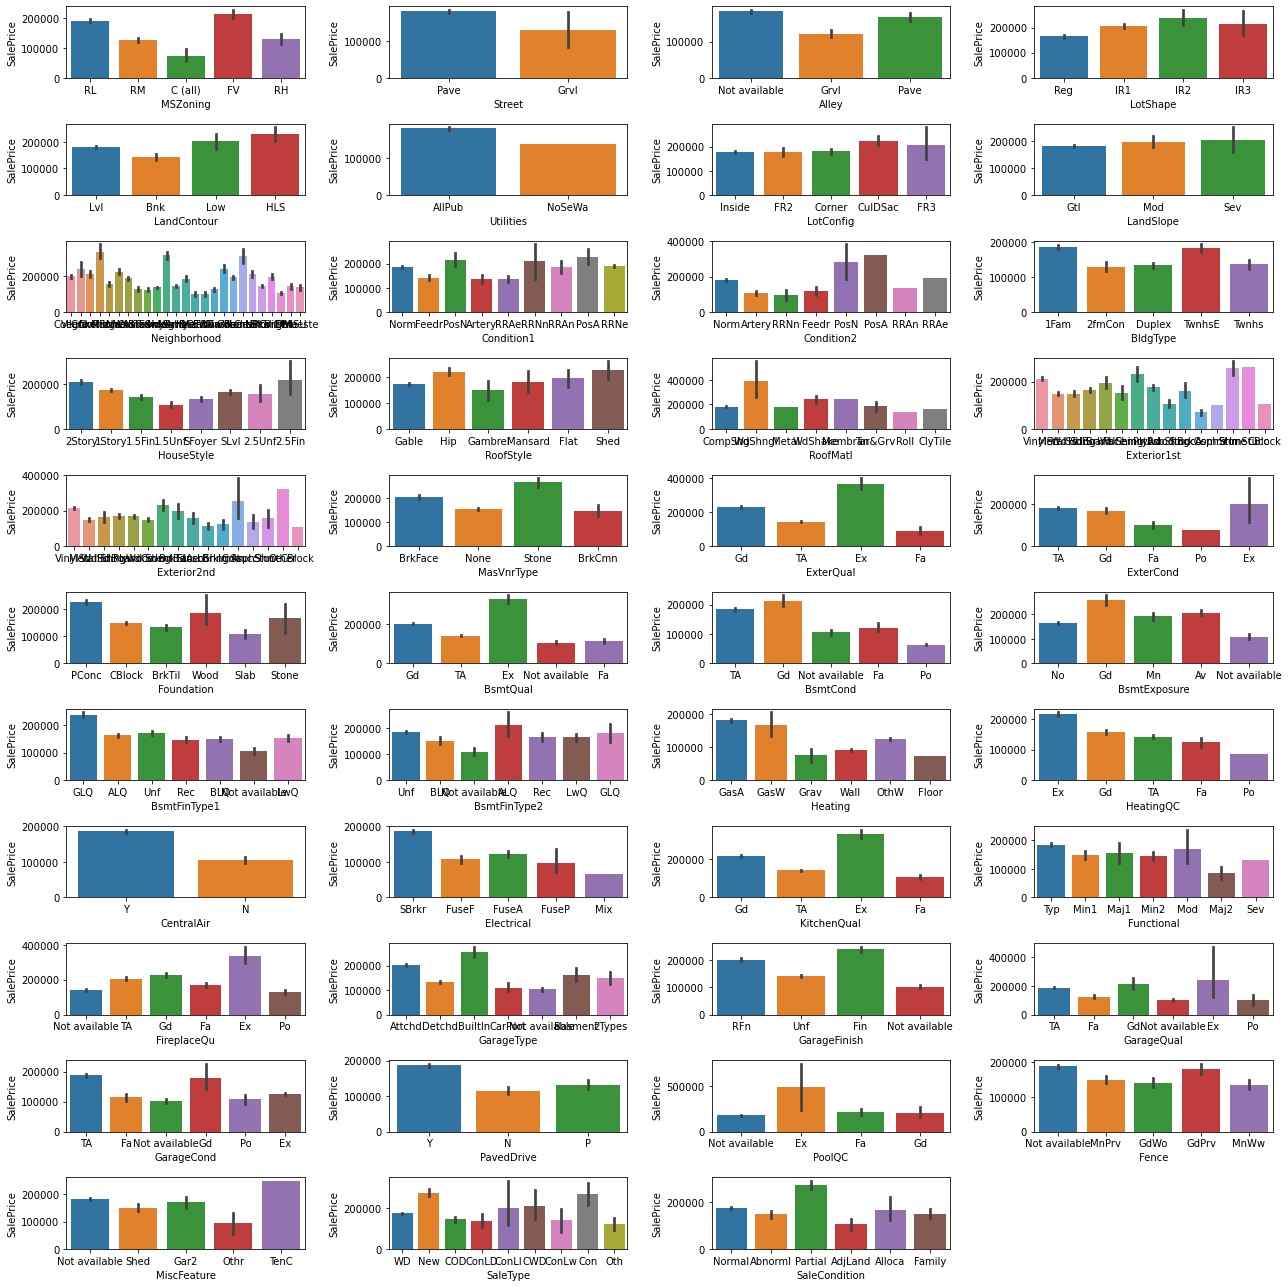

In [26]:
myPlot2 = plt.subplots(figsize=(18, 18))
feature_list = categorical.columns.tolist()
i = 0
for feature in feature_list:
    i+=1
    plt.subplot(11, 4, i)
    plt.subplots_adjust(hspace = 4.0)
    sns.barplot(housing2[feature], housing2['SalePrice'])
    plt.tight_layout()

#### We notice that a number of features can be useful in predicting the target value while some lack predictive power. 
    A few useful features:
    1. MSZoning
    2. Street & Alley (similar)
    3. Neighbourhood.
    4. CentralAir
    5. HeatingQC
    6. ExterQual
    7. KitchenQual
    8. BsmtQual

### Distribution of target feature

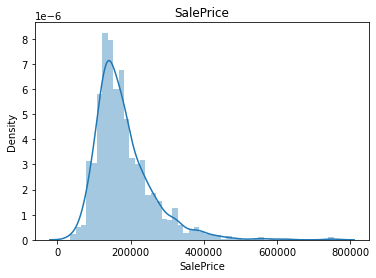

In [27]:
# We wish to check the distribution of the target feature

plt.title('SalePrice')
sns.distplot(housing2['SalePrice'])
plt.show()

### Observations:
We notice a right-skewness in the target feature. This can later be corrected using a log transform if needed.

### Dropping categorical features lacking predictive power
    From earlier observations, we know that some features are quite lacking:
    1. PoolQC (99.52 percent of values correspond to "No pool".

In [28]:
housing2.drop(['PoolQC'], axis=1, inplace=True)

### Dropping features with high correlation
    Recall that we identified the following featuers are being highly correlated:
    1. GarageArea and GarageCars -- Drop GarageCars
    2. YearBuilt and GarageYrBlt -- Drop GarageYrBlt
    3. GrLivArea and TotRmsAbvGr -- Drop TotRmsAbvGr 
    4. 1stFlrSF and TotalBsmtSF -- Drop 1stFlrSF

In [29]:
housing2.drop(['GarageCars', 'GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF'], axis=1, inplace=True)

### Dropping rows with missing values for a feature:

In [30]:
## We observed earlier that categorical variable 'Electrical' has 0.07 percent missing values. Instead of imputing it with mode, we chose to remove those rows as only a small number will be lost.
housing2.dropna(subset=['Electrical'], inplace=True)
## MasVnrType and MasVnrArea also have 0.55 percent missing values. They appear to be missing together.
## We will remove all such rows.
housing2.dropna(subset=['MasVnrArea'], inplace=True)

### Updating categories of different feature types

In [31]:
numerical_original = housing2.select_dtypes(include=[np.number])
ordered_categorical_new = [element for element in ordered_categorical if element in numerical_original.columns.tolist()]
ordered_categorical = ordered_categorical_new
categorical = housing2.select_dtypes(exclude=[np.number])

### Checking missing values again
The only one left now is LotFrontage and it will be imputed once train-test split is done.

In [32]:
# Percentage of missing values for all attributes
round(100*(housing2.isnull().sum()/len(housing.index)), 2).sort_values(ascending = False).to_frame('Missing values').reset_index()

,index,Missing values
0,LotFrontage,17.6
1,Id,0.0
2,BsmtFullBath,0.0
3,KitchenQual,0.0
4,KitchenAbvGr,0.0
5,BedroomAbvGr,0.0
6,HalfBath,0.0
7,FullBath,0.0
8,BsmtHalfBath,0.0
9,GrLivArea,0.0


## Feature encoding: Creating dummy variables for categorical features

In [33]:
housing2 = housing2.drop(['Id'], axis=1)

In [34]:
ordered_categorical_new = ['MSSubClass', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True)
for cat in ordered_categorical_new:
    housing2[cat] = housing2[cat].astype(ordered_cat)

categorical = housing2.select_dtypes(exclude=[np.number])
#categorical.columns
numerical = housing2.select_dtypes(include=[np.number])

In [35]:
housing2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1451 non-null   category
 1   MSZoning       1451 non-null   object  
 2   LotFrontage    1194 non-null   float64 
 3   LotArea        1451 non-null   float64 
 4   Street         1451 non-null   object  
 5   Alley          1451 non-null   object  
 6   LotShape       1451 non-null   object  
 7   LandContour    1451 non-null   object  
 8   Utilities      1451 non-null   object  
 9   LotConfig      1451 non-null   object  
 10  LandSlope      1451 non-null   object  
 11  Neighborhood   1451 non-null   object  
 12  Condition1     1451 non-null   object  
 13  Condition2     1451 non-null   object  
 14  BldgType       1451 non-null   object  
 15  HouseStyle     1451 non-null   object  
 16  OverallQual    1451 non-null   int64   
 17  OverallCond    1451 non-null   in

In [36]:
dummies = pd.get_dummies(housing2[categorical.columns.tolist()], drop_first=True)

In [37]:
housing2 = housing2.drop(categorical, axis = 1)
X = pd.concat([housing2, dummies], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Columns: 275 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(7), int64(11), uint8(257)
memory usage: 579.5 KB


In [38]:
y = X['SalePrice']
X.drop(['SalePrice'], axis=1, inplace = True)
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Not available,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Not available,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Not available,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Not available,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Not available,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Not available,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Not available,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Not available,GarageFinish_Not available,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Not available,GarageQual_Po,GarageQual_TA,Gar

## Model Building

### Taking log transformation of target attribute
We had seen the right-skewed distribution earlier and the log transformation could help fix this.

In [39]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

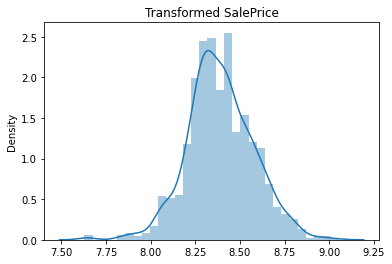

In [40]:
# We use a more general transformation called the box-cox transformation here.
# The log transformation can be seen as a special case of this.
transformer = PowerTransformer(method='box-cox', standardize=False)
y_train = transformer.fit_transform(y_train.to_frame())
y_test = transformer.transform(y_test.to_frame())

# Verifying resulting distribution of target feature
plt.title('Transformed SalePrice')
sns.distplot(y_train)
plt.show()

### Observations:
We notice that the box-cox transform has fixed the skewness to a reasonable degree.

In [41]:
## We need to impute the values for LotFrontage since we cannot remove 17.6 percent of missing values.
## And we wish to do any imputation post the splitting.

si = SimpleImputer(missing_values=np.nan, strategy='median')
si.fit(X_train[['LotFrontage']])
X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])

In [42]:
# We use a Minmax Scaler to scale the data. This is crucial for building a regression model with regularization.
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = DataFrame(X_train)
X_train.columns = X.columns
X_test = scaler.transform(X_test)
X_test = DataFrame(X_test)
X_test.columns = X.columns

### Feature selection using RFE

In [43]:
## We use RFE to determine the top n features for the given regression problem

def best_features(n):
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    rfe = RFE(lm, n)
    rfe = rfe.fit(X_train, y_train)
    # rfe_list = list(zip(X_tr_scaled.columns,rfe.support_,rfe.ranking_))
    return list(X_train.columns[rfe.support_])

In [44]:
print("Top 40 features: \n", best_features(40))
print()
print("Top 60 features: \n", best_features(60))

Top 40 features: 
 ['OverallQual', 'OverallCond', 'YearBuilt', 'GrLivArea', 'MSSubClass_90', 'Condition2_PosN', 'BldgType_Duplex', 'RoofStyle_Shed', 'RoofMatl_Metal', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior2nd_CBlock', 'BsmtQual_Not available', 'BsmtCond_Not available', 'BsmtCond_Po', 'BsmtFinType1_Not available', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'Electrical_Mix', 'BsmtFullBath_3', 'BsmtHalfBath_2', 'KitchenAbvGr_1', 'KitchenAbvGr_2', 'KitchenAbvGr_3', 'Functional_Sev', 'Fireplaces_1', 'Fireplaces_2', 'Fireplaces_3', 'FireplaceQu_Not available', 'GarageType_Not available', 'GarageFinish_Not available', 'GarageQual_Not available', 'GarageCond_Not available', 'MiscFeature_Not available', 'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC']

Top 60 features: 
 ['OverallQual', 'OverallCond', 'YearBuilt', 'GrLivArea', 'MSSubClass_45', 'MSSubClass_90', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Condition2_

### Building a linear model using Statsmodels

#### Model 1: Using only top 60 features

In [45]:
# Creating X_test dataframe with RFE selected variables
feat = best_features(60)
X_train_rfe = X_train[feat]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     154.3
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:43:26   Log-Likelihood:                 1314.5
No. Observations:                1015   AIC:                            -2541.
Df Residuals:                     971   BIC:                            -2324.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### Model 2: Using only top 80 features

In [46]:
# Creating X_test dataframe with RFE selected variables
feat = best_features(80)
X_train_rfe = X_train[feat]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     206.1
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:43:29   Log-Likelihood:                 1632.2
No. Observations:                1015   AIC:                            -3136.
Df Residuals:                     951   BIC:                            -2821.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### Model 3: Using only top 200 features

In [47]:
# Creating X_test dataframe with RFE selected variables
feat = best_features(200)
X_train_rfe = X_train[feat]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     99.41
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:43:31   Log-Likelihood:                 1858.7
No. Observations:                1015   AIC:                            -3349.
Df Residuals:                     831   BIC:                            -2444.
Df Model:                         183                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### Observations:
    1. Since a number of categorical features is huge and we converted certain discrete numerical variables into categorical ones, the dummy variables make the number of features quite high.
    2. We observe that gradually between models with 200 and 250 features, the adjusted R-squared begins to decline.

### Calculating the VIF for features in model 3: Dealing with multicollinearity

In [48]:
# Calculating the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_t = X_train_rfe
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
## Attempting to identify features that should be eliminated for reducing multicollinearity.
extreme_vif = vif[vif['VIF']>10]
extreme_vif

,Features,VIF
132,Heating_OthW,inf
131,Heating_Grav,inf
165,Fireplaces_1,inf
166,Fireplaces_2,inf
167,Fireplaces_3,inf
153,KitchenAbvGr_1,inf
169,FireplaceQu_Not available,inf
173,GarageType_Not available,inf
174,GarageFinish_Not available,inf
177,GarageQual_Not available,inf


#### Dropping features with VIF>10
    Ideally, this features should be eliminated one by one and each time the VIFs be computed, but for paucity of time and simplicity, this shortcut is being used.

In [49]:
X_test_rfe = X_test[feat]
X_train_rfe2 = X_train_rfe.drop(extreme_vif.Features,axis=1)
X_test_rfe2 = X_test_rfe.drop(extreme_vif.Features,axis=1)

In [50]:
# Calculating the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_t = X_train_rfe2
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,388.63
99,KitchenQual_TA,8.44
105,Functional_Typ,7.65
98,KitchenQual_Gd,5.96
102,Functional_Min2,4.09
11,MSSubClass_75,4.09
35,Condition1_Norm,3.86
78,BsmtCond_TA,3.62
3,OverallQual,3.51
47,HouseStyle_2.5Unf,3.51


In [51]:
# Summary of new model

lm = sm.OLS(y_train, X_train_rfe2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     62.04
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:43:38   Log-Likelihood:                 1376.9
No. Observations:                1015   AIC:                            -2524.
Df Residuals:                     900   BIC:                            -1958.
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.92

#### Fixing training data for further modelling

In [52]:
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)
X_train_rfe2 = X_train_rfe2.drop(['const'], axis = 1)

### First ridge model

Fitting 10 folds for each of 27 candidates, totalling 270 fits


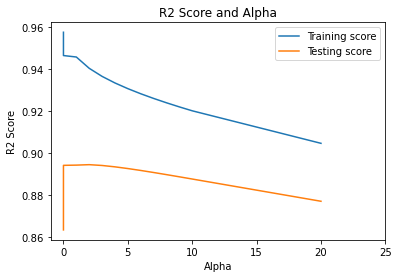

The optimum value of alpha is 2
R2 score on the test set for optimal alpha =  0.8900785474941006
MSE on the test set for optimal alpha is 0.003720628089377484


In [53]:
# We would search through the following hyperparameter 'lambda' values for our regularization using GridSearch.
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
myEstimator = Ridge()

# cross validation
nfolds = 10
model_cv = GridSearchCV(estimator = myEstimator, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = nfolds, 
                        return_train_score=True,
                        verbose = 1) 
model_cv.fit(X_train_rfe, y_train)

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]

# Plot the training and testing scores with increasing regularization hyperparameter alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['Training score', 'Testing score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum value of alpha is',alpha)
ridge_final = Ridge(alpha=alpha)
ridge_final.fit(X_train_rfe,y_train)
ridge_coef = ridge_final.coef_
y_test_pred = ridge_final.predict(X_test_rfe)
print('R2 score on the test set for optimal alpha = ',r2_score(y_test, y_test_pred))
print('MSE on the test set for optimal alpha is', mean_squared_error(y_test, y_test_pred))

### Second ridge model

Fitting 10 folds for each of 27 candidates, totalling 270 fits


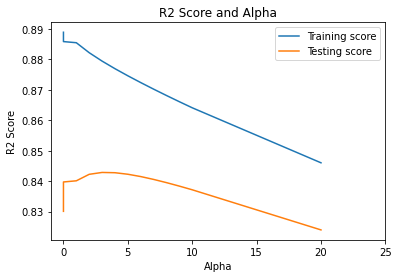

The optimum value of alpha is 3
R2 score on the test set for optimal alpha =  0.8342055579013128
MSE on the test set for optimal alpha is 0.005611820479737007


In [54]:
# We would search through the following hyperparameter 'lambda' values for our regularization using GridSearch.
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
myEstimator = Ridge()

# cross validation
nfolds = 10
model_cv = GridSearchCV(estimator = myEstimator, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = nfolds, 
                        return_train_score=True,
                        verbose = 1) 
model_cv.fit(X_train_rfe2, y_train)

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]

# Plot the training and testing scores with increasing regularization hyperparameter alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['Training score', 'Testing score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum value of alpha is',alpha)
ridge_final2 = Ridge(alpha=alpha)
ridge_final2.fit(X_train_rfe2,y_train)
ridge_coef2 = ridge_final2.coef_
y_test_pred = ridge_final2.predict(X_test_rfe2)
print('R2 score on the test set for optimal alpha = ',r2_score(y_test, y_test_pred))
print('MSE on the test set for optimal alpha is', mean_squared_error(y_test, y_test_pred))

### Model Coefficients: Second ridge model

In [55]:
# Here we see the model coefficients for our second ridge model

ridge_coeff2 = pd.DataFrame(np.atleast_2d(ridge_coef2),columns=X_train_rfe2.columns)
ridge_coeff2 = ridge_coeff2.T
ridge_coeff2.rename(columns={0: 'Ridge Co-Efficients'},inplace=True)
ridge_coeff2.sort_values(by=['Ridge Co-Efficients'], ascending=False,inplace=True)
ridge_coeff2.head(30)

,Ridge Co-Efficients
OverallQual,0.296544
GarageArea,0.124893
LotArea,0.121295
Neighborhood_NoRidge,0.075345
Neighborhood_StoneBr,0.071954
Neighborhood_Crawfor,0.071562
Exterior2nd_BrkFace,0.059562
OverallCond,0.058573
CentralAir_Y,0.056600
Neighborhood_NridgHt,0.053061


### First lasso model

Fitting 10 folds for each of 11 candidates, totalling 110 fits


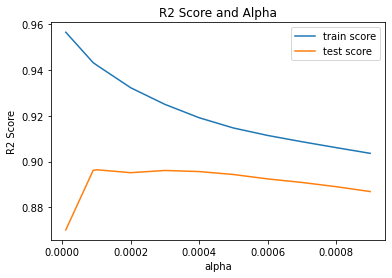

The optimum value of alpha is 0.0001
R2 score on the test set for optimal alpha =  0.891424646285568
MSE on the test set for optimal alpha is 0.0036750652546401865


In [56]:
# We would search through the following hyperparameter 'lambda' values for our regularization using GridSearch.
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009]}

myEstimator = Lasso(random_state=100)

# cross validation
nfolds = 10
model_cv = GridSearchCV(estimator = myEstimator, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = nfolds, 
                        return_train_score=True,
                        verbose = 1) 
model_cv.fit(X_train_rfe, y_train)

cv_results = pd.DataFrame(model_cv.cv_results_)
# Plot the training and testing scores with increasing regularization hyperparameter alpha
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum value of alpha is',alpha)
lasso_final = Lasso(alpha=alpha,random_state=100)
lasso_final.fit(X_train_rfe,y_train)
lasso_coef = lasso_final.coef_
y_test_pred = lasso_final.predict(X_test_rfe)
print('R2 score on the test set for optimal alpha = ',r2_score(y_test, y_test_pred))
print('MSE on the test set for optimal alpha is', mean_squared_error(y_test, y_test_pred))

### Second lasso model

Fitting 10 folds for each of 11 candidates, totalling 110 fits


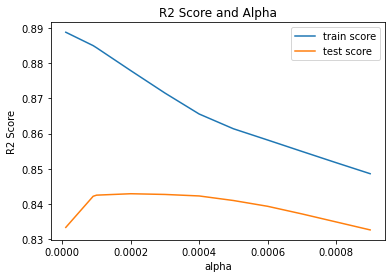

The optimum value of alpha is 0.0002
R2 score on the test set for optimal alpha =  0.8360855381454821
MSE on the test set for optimal alpha is 0.0055481867927316825


In [57]:
# We would search through the following hyperparameter 'lambda' values for our regularization using GridSearch.
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009]}

myEstimator = Lasso(random_state=100)

# cross validation
nfolds = 10
model_cv = GridSearchCV(estimator = myEstimator, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = nfolds, 
                        return_train_score=True,
                        verbose = 1) 
model_cv.fit(X_train_rfe2, y_train)

cv_results = pd.DataFrame(model_cv.cv_results_)
# Plot the training and testing scores with increasing regularization hyperparameter alpha
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum value of alpha is',alpha)
lasso_final2 = Lasso(alpha=alpha,random_state=100)
lasso_final2.fit(X_train_rfe2,y_train)
lasso_coef2 = lasso_final2.coef_
y_test_pred = lasso_final2.predict(X_test_rfe2)
print('R2 score on the test set for optimal alpha = ',r2_score(y_test, y_test_pred))
print('MSE on the test set for optimal alpha is', mean_squared_error(y_test, y_test_pred))

In [58]:
#Displaing the co-efficients of the model
lasso_coeff2 = pd.DataFrame(np.atleast_2d(lasso_coef2),columns=X_train_rfe2.columns)
lasso_coeff2 = lasso_coeff2.T
lasso_coeff2.rename(columns={0: "Lasso Co-Efficients"},inplace=True)
lasso_coeff2.sort_values(by=['Lasso Co-Efficients'], ascending=False,inplace=True)
lasso_coeff2.head(30)

,Lasso Co-Efficients
OverallQual,0.383429
LotArea,0.136046
GarageArea,0.126110
Neighborhood_Crawfor,0.068013
OverallCond,0.067477
Neighborhood_NoRidge,0.066700
Exterior2nd_BrkFace,0.063273
Neighborhood_StoneBr,0.059865
CentralAir_Y,0.050008
BedroomAbvGr_5,0.045891


## Observations and comments:
    1. We notice that the performance of both ridge and lasso on the are roughly the same -- both for higher number of features and the reduced feature set.
    2. The R2 score of Lasso for the reduced feature set is 0.836 and is only very slightly higher than that of Ridge on the same feature set.
    3. The coefficients of the two are also somewhat comparable for the top features.
    4.Features like overall quality (material and finish), lot area, garage area, not having a ridge, overall condition and the Crawford neighbourhood are all very big drivers of the sale price. Obviously there are numerous other crucial parameters that are relevant to achieving a good estimate.

## Subjective questions

### 1. Doubling values for alpha and creating model again

In [59]:
alpha = 6
print('Using alpha = ',alpha)
ridge_final2 = Ridge(alpha=alpha)
ridge_final2.fit(X_train_rfe2,y_train)
ridge_coef2 = ridge_final2.coef_
y_test_pred = ridge_final2.predict(X_test_rfe2)
print('R2 score on the test set for optimal alpha = ',r2_score(y_test, y_test_pred))
print('MSE on the test set for optimal alpha is', mean_squared_error(y_test, y_test_pred))

# Here we see the model coefficients for our second ridge model

ridge_coeff2 = pd.DataFrame(np.atleast_2d(ridge_coef2),columns=X_train_rfe2.columns)
ridge_coeff2 = ridge_coeff2.T
ridge_coeff2.rename(columns={0: 'Ridge Co-Efficients'},inplace=True)
ridge_coeff2.sort_values(by=['Ridge Co-Efficients'], ascending=False,inplace=True)
ridge_coeff2.head(30)

Using alpha =  6
R2 score on the test set for optimal alpha =  0.8374453948542417
MSE on the test set for optimal alpha is 0.00550215827916316


,Ridge Co-Efficients
OverallQual,0.256221
GarageArea,0.123173
LotArea,0.115480
Neighborhood_NoRidge,0.072213
Neighborhood_StoneBr,0.066516
Neighborhood_Crawfor,0.066259
CentralAir_Y,0.054930
LotFrontage,0.053440
Neighborhood_NridgHt,0.052783
OverallCond,0.052660


In [60]:
alpha = 0.0004
print('Using alpha as',alpha)
lasso_final2 = Lasso(alpha=alpha,random_state=100)
lasso_final2.fit(X_train_rfe2,y_train)
lasso_coef2 = lasso_final2.coef_
y_test_pred = lasso_final2.predict(X_test_rfe2)
print('R2 score on the test set for optimal alpha = ',r2_score(y_test, y_test_pred))
print('MSE on the test set for optimal alpha is', mean_squared_error(y_test, y_test_pred))

#Displaing the co-efficients of the model
lasso_coeff2 = pd.DataFrame(np.atleast_2d(lasso_coef2),columns=X_train_rfe2.columns)
lasso_coeff2 = lasso_coeff2.T
lasso_coeff2.rename(columns={0: "Lasso Co-Efficients"},inplace=True)
lasso_coeff2.sort_values(by=['Lasso Co-Efficients'], ascending=False,inplace=True)
lasso_coeff2.head(30)

Using alpha as 0.0004
R2 score on the test set for optimal alpha =  0.840811677767516
MSE on the test set for optimal alpha is 0.005388216127941608


,Lasso Co-Efficients
OverallQual,0.394625
LotArea,0.141041
GarageArea,0.125977
OverallCond,0.067584
Neighborhood_Crawfor,0.058486
Neighborhood_NoRidge,0.057761
Exterior2nd_BrkFace,0.053663
Neighborhood_StoneBr,0.048878
CentralAir_Y,0.044386
FireplaceQu_TA,0.042060


### 3. Modelling with missing top 5 predictor variables

Fitting 10 folds for each of 11 candidates, totalling 110 fits


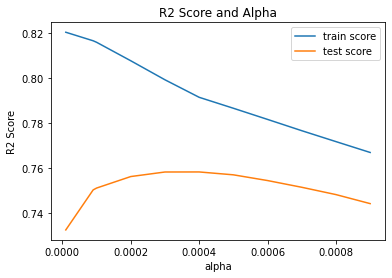

The optimum value of alpha is 0.0004
R2 score on the test set for optimal alpha =  0.7533065377642474
MSE on the test set for optimal alpha is 0.008350095492150315


,Lasso Co-Efficients
LotFrontage,0.136624
Neighborhood_NoRidge,0.120303
Neighborhood_StoneBr,0.106061
Neighborhood_NridgHt,0.087986
FireplaceQu_TA,0.077295
FireplaceQu_Gd,0.073624
CentralAir_Y,0.071284
MSSubClass_75,0.065713
BsmtExposure_Gd,0.065547
LotConfig_CulDSac,0.048060


In [61]:
# We would search through the following hyperparameter 'lambda' values for our regularization using GridSearch.
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009]}

X_train_rfe3 = X_train_rfe2.drop(['OverallQual', 'LotArea', 'GarageArea', 'Neighborhood_Crawfor', 'OverallCond'], axis=1)
X_test_rfe3 = X_test_rfe2.drop(['OverallQual', 'LotArea', 'GarageArea', 'Neighborhood_Crawfor', 'OverallCond'], axis=1)
    
myEstimator = Lasso(random_state=100)

# cross validation
nfolds = 10
model_cv = GridSearchCV(estimator = myEstimator, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = nfolds, 
                        return_train_score=True,
                        verbose = 1) 
model_cv.fit(X_train_rfe3, y_train)

cv_results = pd.DataFrame(model_cv.cv_results_)
# Plot the training and testing scores with increasing regularization hyperparameter alpha
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum value of alpha is',alpha)
lasso_final2 = Lasso(alpha=alpha,random_state=100)
lasso_final2.fit(X_train_rfe3,y_train)
lasso_coef2 = lasso_final2.coef_
y_test_pred = lasso_final2.predict(X_test_rfe3)
print('R2 score on the test set for optimal alpha = ',r2_score(y_test, y_test_pred))
print('MSE on the test set for optimal alpha is', mean_squared_error(y_test, y_test_pred))

#Displaing the co-efficients of the model
lasso_coeff2 = pd.DataFrame(np.atleast_2d(lasso_coef2),columns=X_train_rfe3.columns)
lasso_coeff2 = lasso_coeff2.T
lasso_coeff2.rename(columns={0: "Lasso Co-Efficients"},inplace=True)
lasso_coeff2.sort_values(by=['Lasso Co-Efficients'], ascending=False,inplace=True)
lasso_coeff2.head(30)

### Observations:
    The next 5 most important predictor variables are:
    LotFrontage          	0.136624
    Neighborhood_NoRidge 	0.120303
    Neighborhood_StoneBr 	0.106061
    Neighborhood_NridgHt 	0.087986
    FireplaceQu_TA       	0.077295

### NOTE: The subjective questions not requiring code are exclusively in the PDF.